In [2]:
using DifferentialEquations
using Plots

In [42]:
#Manually create repressilator to test
function oscillator(du, u, p, t)
    I = [0.1, 0, 0]
    k = 1

    du[1] = k*(phi(-u[3]) + I[1] - u[1])
    du[2] = k*(phi(-u[1]) + I[2] - u[2])
    du[3] = k*(phi(-u[2]) + I[3] - u[3])
end

tspan = [0, 100] #Span of time to integrate for
savetimes = LinRange(0, 100, 100) #linear space of points until final time
u0 = fill(0.1, N) #cannot change, can be learned
p = [] #empty for now, can change to include parameters to be varied later
prob = ODEProblem(oscillator, u0, tspan, p)
sol = solve(prob, Rosenbrock23(), reltol=1e-3, abstol=1e-6, saveat=savetimes)

┌ Warning: dt(1.4210854715202004e-14) <= dtmin(1.4210854715202004e-14) at t=0.004832143893210033, and step error estimate = 78.16594331724944. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\Charlotte\.julia\packages\SciMLBase\kTUaf\src\integrator_interface.jl:599


retcode: DtLessThanMin
Interpolation: 1st order linear
t: 1-element Vector{Float64}:
 0.0
u: 1-element Vector{Vector{Float64}}:
 [0.1, 0.1, 0.1]

[1.0]


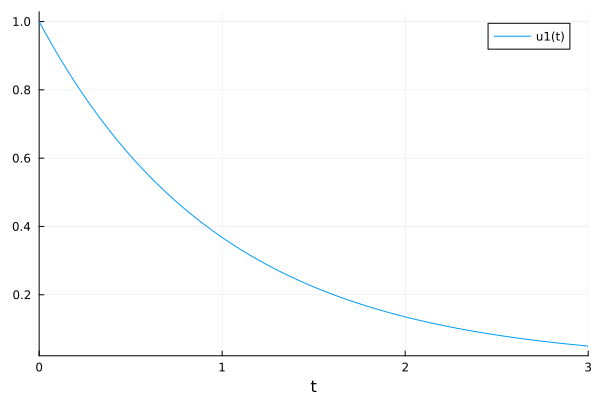

In [17]:
function test(du, u, p, t)
    i = 1
    du[i] = -u[i]
end

endtime = 3
resolution = 300 

tspan = [0, endtime] #Span of time to integrate for
savetimes = LinRange(0, endtime, resolution) #linear space of points until final time
u0 = [1.] #cannot change, can be learned
p = [k, W, I] #empty for now, can change to include parameters to be varied later
prob = ODEProblem(test, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-3, abstol=1e-6, saveat=savetimes)
plot(sol)

In [14]:
#Manually specify an oscillator (repressilator from Alon et al)
N = 3
W = [[1, 0, -1], [-1, 1, 0], [0, -1, 1]] #Notation is INCOMING
W = [[3.6, -3.6, 0], [0, 3.2, -3], [0, -1, 1]] #Notation is INCOMING, from Hiscock supplemental
I = [0, 0, 0]
k = [3.3, 7.3, 1.0] #Learned from hiscock

phi(x) = 1/(exp(x) - 1) #Helper function
#Given N, W, I create a ODE function and run it
function hiscock_model(N, W, k, I, endtime=100, resolution=200)
    function odes(du, u, p, t)
        k, W, I = p
        for i in 1:N
            du[i] = k[i]*(phi(transpose(W[i])*u) + I[i] - u[i])
        end
    end

    tspan = [0, endtime] #Span of time to integrate for
    savetimes = LinRange(0, endtime, resolution) #linear space of points until final time
    u0 = fill(0., N) #cannot change, can be learned
    p = [k, W, I] #empty for now, can change to include parameters to be varied later

    println(u0)
    prob = ODEProblem(odes, u0, tspan, p)
    sol = solve(prob, Tsit5(), reltol=1e-3, abstol=1e-6, saveat=savetimes)
    return sol
end

sol = hiscock_model(N, W, k, I, 3, 300)

[0.0, 0.0, 0.0]


┌ Warning: Automatic dt set the starting dt as NaN, causing instability. Exiting.
└ @ OrdinaryDiffEq C:\Users\Charlotte\.julia\packages\OrdinaryDiffEq\87BwC\src\solve.jl:554
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase C:\Users\Charlotte\.julia\packages\SciMLBase\kTUaf\src\integrator_interface.jl:574


retcode: DtNaN
Interpolation: 1st order linear
t: 1-element Vector{Float64}:
 0.0
u: 1-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0]

In [24]:
function plot_solution(sol)
end

1-element Vector{Vector{Float64}}:
 [0.1, 0.1, 0.1]

In [ ]:
#Determine number of steady states using BayesOpt method (scan initial conditions)